# Project: Data Wrangling (Part 2)

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

## Data Wrangling

### Data Gathering

In [2]:
twitter_a = pd.read_csv('twitter_archive_master.csv')

In [3]:
twitter_a.head(3)

,tweet_id,timestamp,name,rating,favorite_count,retweet_count,followers_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,890240255349198849,2017-07-26 15:59:51+00:00,Cassie,14,29596,6610,8824238,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo
1,757393109802180609,2016-07-25 01:52:43+00:00,NaN,10,5784,1723,8824230,2,Labrador_retriever,0.787125,True,Chesapeake_Bay_retriever,0.112676,True,Rottweiler,0.048039,True,doggo
2,758828659922702336,2016-07-29 00:57:05+00:00,NaN,13,11175,3818,8824230,1,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.121840,True,doggo


### Data Accessing

In [4]:
twitter_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 18 columns):
tweet_id           1987 non-null int64
timestamp          1987 non-null object
name               1441 non-null object
rating             1987 non-null int64
favorite_count     1987 non-null int64
retweet_count      1987 non-null int64
followers_count    1987 non-null int64
img_num            1987 non-null int64
p1                 1987 non-null object
p1_conf            1987 non-null float64
p1_dog             1987 non-null bool
p2                 1987 non-null object
p2_conf            1987 non-null float64
p2_dog             1987 non-null bool
p3                 1987 non-null object
p3_conf            1987 non-null float64
p3_dog             1987 non-null bool
stage              305 non-null object
dtypes: bool(3), float64(3), int64(6), object(6)
memory usage: 238.8+ KB


In [5]:
twitter_a.describe()

,tweet_id,rating,favorite_count,retweet_count,followers_count,img_num,p1_conf,p2_conf,p3_conf
count,1.987000e+03,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,7.356264e+17,11.689985,8191.742828,2423.602919,8.824234e+06,1.203322,0.593317,1.344725e-01,6.037114e-02
std,6.739210e+16,40.742214,12060.632179,4336.086188,7.413844e+01,0.561369,0.271959,1.005706e-01,5.091543e-02
min,6.660209e+17,0.000000,70.000000,11.000000,8.824209e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758218e+17,10.000000,1757.500000,542.000000,8.824216e+06,1.000000,0.361531,5.409535e-02,1.624950e-02
50%,7.083495e+17,11.000000,3707.000000,1176.000000,8.824227e+06,1.000000,0.587342,1.175080e-01,4.953060e-02
75%,7.873602e+17,12.000000,10171.000000,2760.000000,8.824232e+06,1.000000,0.844583,1.950575e-01,9.180755e-02
max,8.924206e+17,1776.000000,154474.000000,76708.000000,8.824872e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Quality
-  While importing our data, some columns data types where changed
-  Some columns have outliers in their data

### Data Cleaning

##### Define
>Change columns with wrong datatypes to the required datatype

##### Code

In [6]:
# Pandas by default import the tweet_id as integral because they are all number,
# prevent any future issue when exploring the data because of its data type, i converted them to string
twitter_a.tweet_id = twitter_a.tweet_id.astype(str)
twitter_a.img_num = twitter_a.img_num.astype(str)
twitter_a.timestamp = pd.to_datetime(twitter_a.timestamp)

##### Test

In [7]:
twitter_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 18 columns):
tweet_id           1987 non-null object
timestamp          1987 non-null datetime64[ns, UTC]
name               1441 non-null object
rating             1987 non-null int64
favorite_count     1987 non-null int64
retweet_count      1987 non-null int64
followers_count    1987 non-null int64
img_num            1987 non-null object
p1                 1987 non-null object
p1_conf            1987 non-null float64
p1_dog             1987 non-null bool
p2                 1987 non-null object
p2_conf            1987 non-null float64
p2_dog             1987 non-null bool
p3                 1987 non-null object
p3_conf            1987 non-null float64
p3_dog             1987 non-null bool
stage              305 non-null object
dtypes: bool(3), datetime64[ns, UTC](1), float64(3), int64(4), object(7)
memory usage: 238.8+ KB


##### Define
>Remove outlier from each quantitative data by creating a confidence interval of 98%

##### Code

In [8]:
np.percentile(twitter_a.rating, 1), np.percentile(twitter_a.rating, 99)

(3.0, 14.0)

##### Test

In [9]:
# Create a confidence interval of 99% for each numerical data to eliminater outliers
columns = ['rating', 'favorite_count', 'retweet_count', 'followers_count']
for column in columns:
    twitter_a.drop(
        twitter_a[(twitter_a[column] < np.percentile(twitter_a[column], 1)) | (twitter_a[column] > np.percentile(twitter_a[column], 99))].index,
        inplace = True)

In [10]:
twitter_a.describe()

,rating,favorite_count,retweet_count,followers_count,p1_conf,p2_conf,p3_conf
count,1850.000000,1850.000000,1850.000000,1.850000e+03,1850.000000,1.850000e+03,1.850000e+03
mean,10.612973,7237.736757,2007.409189,8.824227e+06,0.593710,1.355344e-01,6.028536e-02
std,2.017888,8096.860732,2218.243263,3.354647e+01,0.271542,1.012125e-01,5.082769e-02
min,3.000000,171.000000,60.000000,8.824211e+06,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,1869.500000,565.000000,8.824216e+06,0.362857,5.407533e-02,1.641690e-02
50%,11.000000,3724.500000,1177.500000,8.824227e+06,0.588030,1.193165e-01,4.952715e-02
75%,12.000000,9905.500000,2650.500000,8.824232e+06,0.841932,1.962177e-01,9.186877e-02
max,14.000000,49446.000000,14424.000000,8.824852e+06,1.000000,4.880140e-01,2.734190e-01


### Data Exploring 

### 	The dogs stage investigation

In [11]:
dogs_stage = pd.DataFrame()

dogs_stage['count'] = twitter_a.groupby('stage')['stage'].count()

dogs_stage['avg_likes'] = twitter_a.groupby('stage')['favorite_count'].mean()

dogs_stage['avg_retweets'] = twitter_a.groupby('stage')['retweet_count'].mean()

dogs_stage['avg_rating'] =  twitter_a.groupby('stage')['rating'].mean()

dogs_stage['avg_followers'] =  twitter_a.groupby('stage')['followers_count'].mean()

dogs_stage

,count,avg_likes,avg_retweets,avg_rating,avg_followers
stage,,,,,
doggo,64,11024.218750,2884.046875,11.578125,8.824233e+06
floofer,6,8923.166667,2368.000000,11.833333,8.824230e+06
pupper,197,5905.055838,1836.406091,10.598985,8.824227e+06
puppo,20,13392.750000,3285.850000,11.850000,8.824233e+06


### Observations
1. The pupper dogs forms large proportion of the dogs
2. On average, the dogs in the puppo stage has more likes than others
3. Also, the puppo dogs has the highest average retweet in comparison to the other stage of dog
4. Puppo better rated on an average than other stage of dogs
5. Finally, there is no significant difference between the average followers of the dogs

### Investigation on the dogs rating 

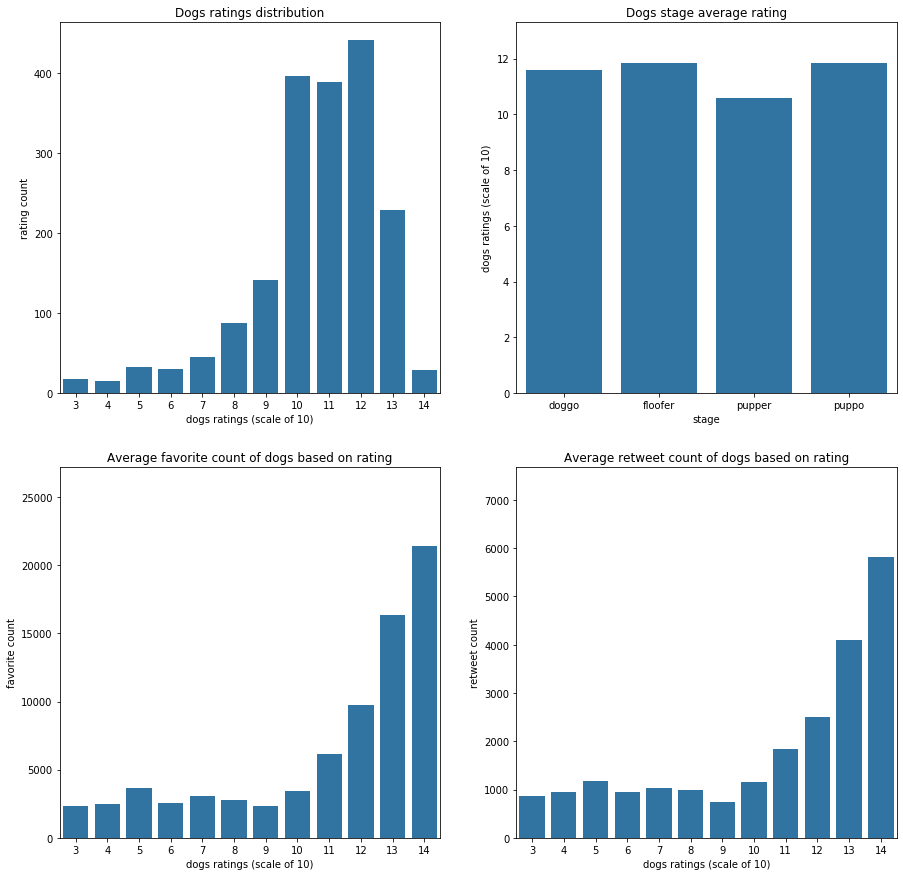

In [12]:
base_color = sb.color_palette()[0]

plt.figure(figsize=[15,15])
# Subplot 1
# The distribution of the dogs ratings
plt.subplot(2,2,1)
sb.countplot(data = twitter_a, x='rating', color = base_color);
plt.title('Dogs ratings distribution');
plt.xlabel('dogs ratings (scale of 10)')
plt.ylabel('rating count');


# Subplot 2
# Average rating of the each stage of dogs
plt.subplot(2,2,2)
sb.barplot(data = twitter_a, x='stage', y='rating',errwidth =0, color = base_color);
plt.ylabel('dogs ratings (scale of 10)')
plt.title('Dogs stage average rating')


# Subplot 3
#
plt.subplot(2,2,3)
base_color = sb.color_palette()[0]
sb.barplot(data = twitter_a, x='rating', y='favorite_count', errwidth =0, color = base_color);
plt.title('Average favorite count of dogs based on rating');
plt.xlabel('dogs ratings (scale of 10)')
plt.ylabel('favorite count');


# Subplot
#
plt.subplot(2,2,4)
sb.barplot(data = twitter_a, x='rating', y='retweet_count', errwidth =0, color = base_color);
plt.title('Average retweet count of dogs based on rating');
plt.xlabel('dogs ratings (scale of 10)')
plt.ylabel('retweet count');

### Observations
1. Most dogs were allocated a rating of 12 by the users
2. On average, dogs in the floofer stage has the better rating compaired to others 
3. The shape of the favorite and retweet count distribution based on rating in similiar. This imply a direct relationship between the favorite and retweet count
4. Dogs with rating of 14 has the highest favorite and retweet count
5. In general, there is on trend relating the favorite and retweet count to the ratings but an increasing trend is observed from a rating of 9 to 14 

### Investigation of the dogs bred predictions result

In [13]:
img_dict = []

# Loop through the different predictions algorithm to get some information 
for num in np.arange(1,4):
    num = num.astype(str)
    
    pred_count = twitter_a['p{}_dog'.format(num)].sum()

# Correct prediction is obtained when the image number is thesame as the classifiers number
# and the prediction for that breed is True

    correct_pred = sum((twitter_a['img_num'] == '{}'.format(num)) & (twitter_a['p{}_dog'.format(num)] == True))
    
    pred_accuracy = correct_pred/pred_count * 100
    
    pred_avg_conf = twitter_a['p{}_conf'.format(num)].mean()

    img_dict.append({'pred_count':pred_count, 'correct_pred':correct_pred, 'pred_accuracy(%)':pred_accuracy, 'pred_avg_conf':pred_avg_conf})

img_df=pd.DataFrame(img_dict)

#Start indexing from 1 to aline with image number
img_df.index +=1
img_df

,pred_count,correct_pred,pred_accuracy(%),pred_avg_conf
1,1379,1172,84.989123,0.593710
2,1391,146,10.496046,0.135534
3,1346,50,3.714710,0.060285


In [14]:
# Deep investigation on the classifier 1
p1_df = pd.DataFrame()

p1_df['pred_count'] = twitter_a.groupby('p1')['p1_dog'].sum()

p1_df['correct_pred'] = twitter_a[(twitter_a['img_num'] == '1') & (twitter_a['p1_dog'] == True)].groupby('p1')['p1'].count()

p1_df['pred_accuracy(%)'] = p1_df['correct_pred']/p1_df['pred_count'] * 100

p1_df['pred_avg_conf'] = twitter_a.groupby('p1')['p1_conf'].mean()

p1_df.sort_values(by = ['pred_count'], ascending = False, inplace=True)

p1_df.head(10)

,pred_count,correct_pred,pred_accuracy(%),pred_avg_conf
p1,,,,
golden_retriever,130.0,98.0,75.384615,0.721899
Labrador_retriever,90.0,80.0,88.888889,0.644050
Pembroke,82.0,71.0,86.585366,0.721344
Chihuahua,73.0,61.0,83.561644,0.574581
pug,52.0,46.0,88.461538,0.768736
chow,39.0,32.0,82.051282,0.612089
Samoyed,38.0,34.0,89.473684,0.735467
Pomeranian,36.0,30.0,83.333333,0.756210
toy_poodle,34.0,28.0,82.352941,0.610915


### Observation
1. Most prediction of the dog breed was image number 1
2. Classsifier 1 has the best accuray and also average prediction coeffiecent 
3. With respect to classifier 1:
    - Majority of the predictions and correct predictions where golden_retriever 
    - Samoyed breed had the best accuracy and also average prediction confindence 


## Conclusion 

With view to my result and observation, it could be concluded that:
-	People are attracted to and rated dogs in puppo stage better than others
-	Dogs with rating higher than 10 are most likely to be better and attractive than those with lesser rating
-	Finally, the classifier 1 algorithm for the dogs image predictions is better than the other algorithm 
